In [19]:
import numpy as np
import sympy
import pandas as pd

x, y, z, t = sympy.symbols("x y z t")

# Diferenciação Numérica

Principais formulas de diferenças finitas usando expansão em série de Taylor

### Diferença finita progressiva com dois pontos
Aproximação de Taylor para o ponto $x_{i+1}$
  $$
    f(x_{i+1}) = f(x_i) + f'(x_i)h + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + ...
  $$
  com $h=x_{i+1} - x_i$.

  Fixando dois primeiro termos da serie e deixando os outros termos como um resíduo, temos,
  $$
  f(x_{i+1}) = f(x_i) + f'(x_i)h + \frac{h^2}{2!}f''(\xi )
  $$
  Isolando $f'(x)$, temos:
  $$
  f'(x_i) = \frac{f(x_{i+1}) - f(x_i)}{h} - \frac{h}{2}f''(\xi )
  $$
  com erro de truncamento,
  $$
  - \frac{h}{2}f''(\xi ) = O(h)
  $$

  ### Diferença finita regressiva com dois pontos

  Aproximação de Taylor para o ponto $x_{i-1}$
  $$
      f(x_{i-1}) = f(x_i) - f'(x_i)h + \frac{h^2}{2!}f''(x_i) - \frac{h^3}{3!}f'''(x_i) + ...
  $$
  com $h=x_{i} - x_{i-1}$.
  
  Fixando dois primeiro termos da serie e deixando os outros termos como um resíduo, temos,
  $$
    f(x_{i-1}) = f(x_i) - f'(x_i)h + \frac{h^2}{2!}f''(\xi )
  $$
  Isolando $f'(x)$, temos:
  $$
    f'(x_i) = \frac{f(x_{i}) - f(x_{i-1})}{h} + \frac{h}{2}f''(\xi )
  $$
com erro de truncamento,
  $$
       \frac{h}{2}f''(\xi ) = O(h)
  $$

## Diferença finita central com dois pontos
Aproximação de Taylor para o ponto $x_{i+1}$
$$
      f(x_{i+1}) = f(x_i) + f'(x_i)h + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(\xi_1)
$$
com $\xi_1 \in (x_{i},x_{i+1})$.
Aproximação de Taylor para o ponto $x_{i-1}$
$$
      f(x_{i-1}) = f(x_i) - f'(x_i)h + \frac{h^2}{2!}f''(x_i) - \frac{h^3}{3!}f'''(\xi_2)
$$
com $\xi_2 \in (x_{i-1},x_{i})$.
Subtraindo as equações acima, temos
$$
      f(x_{i+1}) - f(x_{i-1}) = 2hf'(x_i) + \frac{h^3}{3!}f'''(\xi_1) + \frac{h^3}{3!}f'''(\xi_2)
$$
Resolvendo para $f'(x)$, temos
$$
    f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + \frac{h^2}{6}f'''(\xi )
$$
com erro de truncamento,
  $$
       \frac{h^2}{6}f'''(\xi ) = O(h^2)
  $$

## Exercício

1. Faça uma tabela do erro para as formulas de diferencias finitas acima para a aproximação de $f'(0)$, onde $f(x) = \sin(x) - \cos(x)$ com $h=10^{-1}, 10^{-2},...,10^{-10}$. O erro mínimo corresponde à expectativa teórica?



In [59]:
# Implementando a função em questão


def f(x):
    return np.sin(x) - np.cos(x)


def f_dot(x):
    return np.cos(x) + np.sin(x)


# Implemente uma função para diferencição progressiva: dfp
def diferencicao_progressiva(x, h):
    return (f(x + h) - f(x)) / h


# Implemente uma função para diferenciação regressiva: dfr
def diferencicao_regressiva(x, h):
    return (f(x) - f(x - h)) / h


# Implemente uma função para diferenciação central: dfc
def diferencicao_central(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)


# Criar uma tabela: h, error-dfp, error-dfr, error-dfc
aux_dict = {"h": [], "error_dfp": [], "error_dfr": [], "error_dfc": []}

h_list = np.linspace(10**-3, 10**-5, num=(5 - 3 + 1))

resultado_exato = f_dot(0)

for h in h_list:
    dfp = diferencicao_progressiva(0, h)
    dfr = diferencicao_regressiva(0, h)
    dfc = diferencicao_central(0, h)

    aux_dict["h"].append(h)
    aux_dict["error_dfp"].append(((resultado_exato - dfp) ** 2) ** 0.5)
    aux_dict["error_dfr"].append(((resultado_exato - dfr) ** 2) ** 0.5)
    aux_dict["error_dfc"].append(((resultado_exato - dfc) ** 2) ** 0.5)

df = pd.DataFrame(aux_dict)
df.head(5 - 3 + 1)

,h,error_dfp,error_dfr,error_dfc
0,0.001000,0.000500,0.000500,1.666666e-07
1,0.000505,0.000252,0.000253,4.250411e-08
2,0.000010,0.000005,0.000005,1.565337e-11


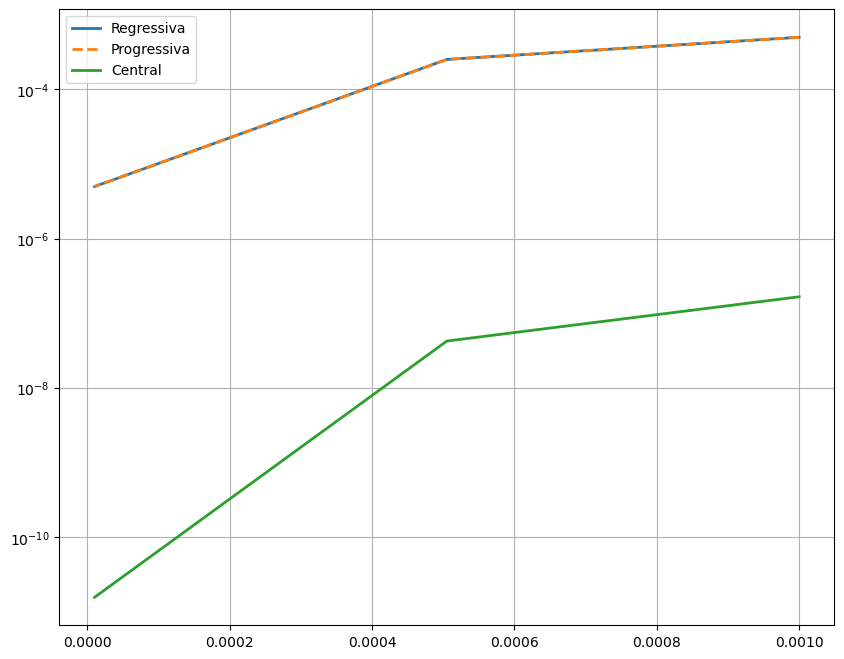

In [60]:
import matplotlib.pyplot as plt

## Plotando

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.yscale("log")
plt.plot(h_list, df.error_dfr, linewidth=2.0, label="Regressiva")
plt.plot(h_list, df.error_dfp, linewidth=2.0, label="Progressiva", linestyle="--")
plt.plot(h_list, df.error_dfc, linewidth=2.0, label="Central")
plt.legend()
plt.show()

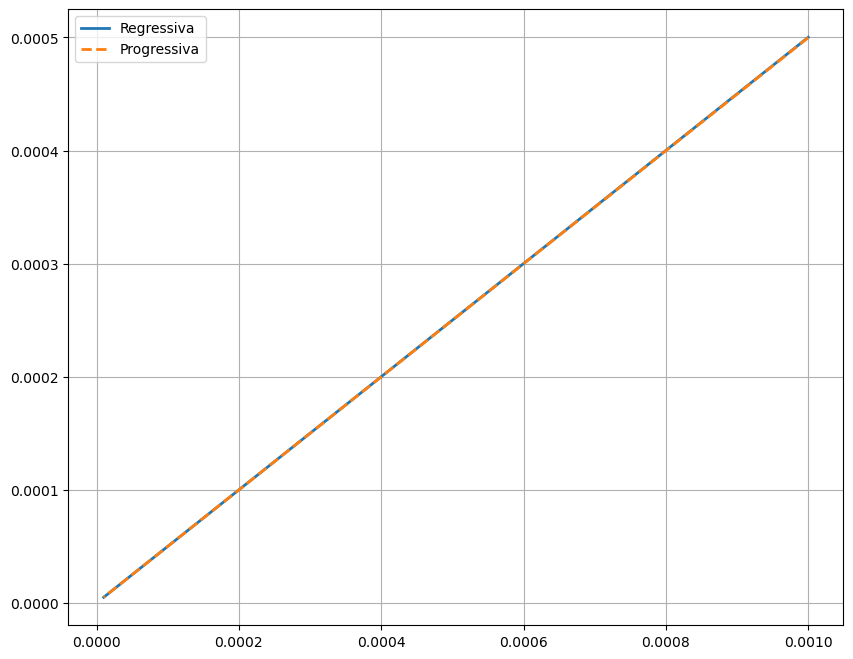

In [61]:
## Plotando

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.plot(h_list, df.error_dfr, linewidth=2.0, label="Regressiva")
plt.plot(h_list, df.error_dfp, linewidth=2.0, label="Progressiva", linestyle="--")
plt.legend()
plt.show()